# 深層学習　まとめ

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## 深層学習とは
---  

深層学習またはディープラーニングは、人工知能(Artificial Inteligence)の一分野で、特に多層のニューラルネットワークを使用してデータからパターンを学習する技術。  
従来の機械学習では特徴量把握を人間が分析をして行っていたが、深層学習はデータの特徴を自動的に抽出でき、画像認識、自然言語処理、音声認識等、様々な複雑なタスクで優れた性能を発揮している。  
<img src="./images/ml_dl.png" width="60%">

## ニューラルネットワークとは
---  
ニューラルネットワークは、人間の脳を模倣して作られたアルゴリズム。脳の神経細胞(ニューロン)の働きをモデル化して、コンピュータで問題を解決するために使用されている。  
特に、画像認識、音声認識、自然言語処理などで活躍している。

<img src="https://udemy.benesse.co.jp/wp-content/uploads/7364a57e024fe580ea9717de1cc578ec.png">

基本的な構造は、入力層、隠れ層(中間層)、出力層の3つの層で構成されている。  
- 入力層：データがインプットされる層
- 隠れ層：データを処理する層。１層以上持つことができ、この層で特徴抽出が行われる
- 出力層：最終的な結果を出力する層

<img src="./images/neural_network.png" width="15%">

## 活性化関数
---

### ステップ関数の実装
ステップ関数は、ある閾値を基準にして、出力を0か1のどちらかに決定する関数。  
閾値以上なら1を、それ未満なら0を返す。  

特徴：
- 出力が離散的(0, 1)なので、単純なモデルで使いやすい
- 非線形の関数で、ニューロンの発火(活性化)を表現するのにつかわれることが多かった
- 欠点として、微分ができないため、誤差逆伝播による学習ができないので、現代のニューラルネットワークではほとんど使われていない

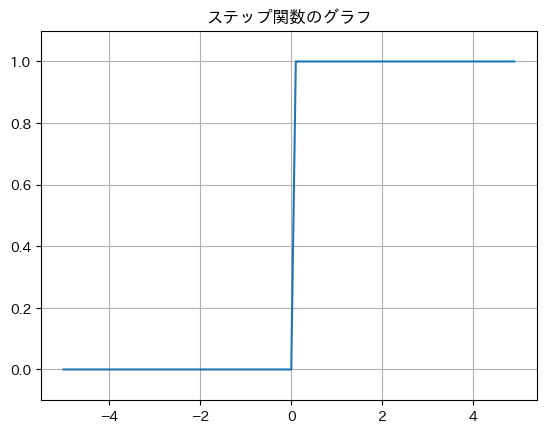

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.title('ステップ関数のグラフ')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

### シグモイド関数の実装

シグモイド関数は、ステップ関数に似ているが、出力が滑らかに0から1の範囲に収まるようにする関数。  
ニューロンの出力を0~1の連続値に変換するため、二値分類問題などでよく使われる。

$ \displaystyle f(x) = \frac{1}{1+e^{-1}} $

特徴：
- 出力が0~1の連続値で、入力が大きければ1に近く、小さければ0に近くなる
- 微分可能なので、誤差逆伝播を使った学習ができる
- 入力が大きい場合や小さい場合に、出力が0か1に収束してしまい、勾配消失問題が発生しやすいという欠点もある

#### 勾配消失問題(Vanishing Gradient Ploblem)とは

主にディープニューラルネットワークで起こる問題の一つ。特にシグモイド関数やtanh関数のような活性化関数を使う場合に目立つ問題となっている。  
ニューラルネットワークの学習では、誤差逆伝播法を使って、ネットワークの重みを調整してい句方法をとっているが、各層の重みを更新するために、誤差(損失)を計算してその誤差の勾配(グラデーション)を使って重みを少しづつ更新している。  
しかし、勾配消失問題が発生すると、ある層に伝わってくる勾配が非常に小さくなり、結果的に前の層の重みがほとんど更新されない状態になる。  
これによって、深い層を持つニューラルネットワークでは、前半の層が全然学習できないことが起きてしまう。

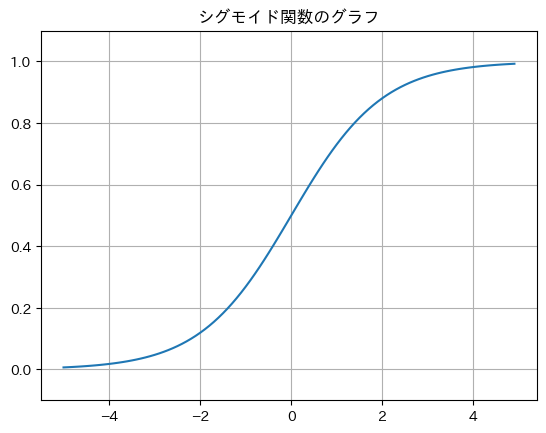

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.title('シグモイド関数のグラフ')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

### ReLU関数(Rectified Linear Unit)の実装
ReLU関数は、入力が0未満の場合は0を、0以上の場合はそのまま出力するシンプルな関数。  
最近のディープラーニングでは最もよく使われている活性化関数。  

$ \displaystyle f(x) = max(0, x) $

特徴：
- 非線形関数でありながら、計算が非常にシンプルで高速
- 出力が0以上の値に制限され、0未満の値は全て0に変換される
- シグモイド関数のように勾配消失問題が起こりにくいため、深いニューラルネットワークでも効果的に学習できる
- 入力が0未満の値を全て0にしてしまうので、死んだReLU問題が起こることがある。

#### 死んだReLU問題とは

ニューラルネットワークの学習中にReLU関数が「死んで」しまう現象を指す。
具体的には、ReLU関数が負の値を持つ入力に対しては常に0を返すため、一定のニューロンが学習中に全く活動しなくなる問題。  
この状態になると、そのニューロンは重みが更新されなくなり、モデル全体のパフォーマンスが低下してしまう。

<cite>参考: https://dc-okinawa.com/ailands/unleaky-relu/</cite> 

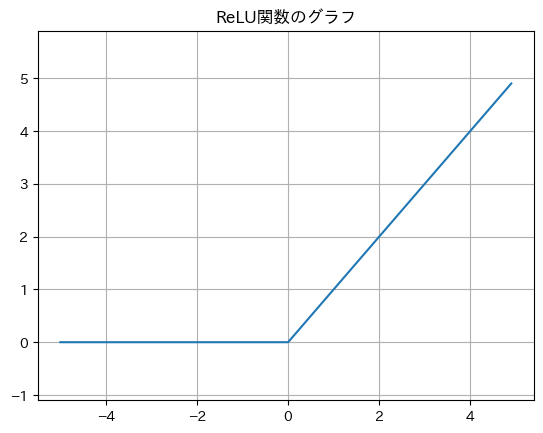

In [13]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU関数のグラフ')
plt.ylim(-1.1, 5.9)
plt.grid(True)
plt.show()

## ３層ニューラルネットワークの実装
以下のニューラルネットワークを構築する

<img src="./images/3_layers_nn.png" width="50%" style="background-color: white;">

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.2, 0.5, 0.7], [0.3, 0.6, 0.8]])
    network['b1'] = np.array([0.2, 0.4, 0.6])
    network['W2'] = np.array([[0.3, 0.7], [0.4, 0.8], [0.5, 0.9]])
    network['b2'] = np.array([0.2, 0.3])
    network['W3'] = np.array([[0.3, 0.6], [0.4, 0.7]])
    network['b3'] = np.array([0.3, 0.4])

    return network

def layer_output(x, W, b, sigmoid):
    return sigmoid(np.dot(x, W) + b)

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    z1 = layer_output(x, W1, b1, sigmoid)
    z2 = layer_output(z1, W2, b2, sigmoid)
    y = layer_output(z2, W3, b3, sigmoid)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.70751408 0.81417981]
